In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'df_imputed_tot_OHE.pkl'
df = pd.read_pickle(filename)

In [2]:
df.describe()

,age_0,age_1,age_2,age_3,age_4,sex_0,sex_1,cp_1,cp_2,cp_3,...,exang_0,exang_1,oldpeak_0,oldpeak_1,oldpeak_2,oldpeak_3,slope_1,slope_2,slope_3,heartdisease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.213043,0.208696,0.218478,0.191304,0.168478,0.210870,0.789130,0.050000,0.189130,0.221739,...,0.633696,0.366304,0.415217,0.145652,0.142391,0.296739,0.556522,0.375000,0.068478,0.553261
std,0.409681,0.406597,0.413438,0.393542,0.374494,0.408148,0.408148,0.218063,0.391825,0.415642,...,0.482056,0.482056,0.493028,0.352949,0.349641,0.457069,0.497065,0.484386,0.252702,0.497426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score

X = df[df.columns[:-1]]
Y = pd.Series(df['heartdisease'])


train_X,test_X,train_Y,test_Y =train_test_split(X,Y,test_size=0.33,shuffle = True, random_state=45)

print(train_X.shape,train_Y.shape,test_X.shape, test_Y.shape)



(616, 40) (616,) (304, 40) (304,)


In [113]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.001,probability=True )
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
pred_training = model.predict(train_X)
print('Test Accuracy for linear SVM is',metrics.accuracy_score(test_Y, prediction2))
print('Training Accuracy for linear SVM is',metrics.accuracy_score(train_Y, pred_training))



#print('F1 micro: is',f1_score(test_Y, prediction2, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction2, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction2, average='weighted'))



model_Linear_SVM = model
        
    







Test Accuracy for linear SVM is 0.8355263157894737
Training Accuracy for linear SVM is 0.8035714285714286


In [53]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1, probability=True)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for rbf SVM is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction1, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction1, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction1, average='weighted'))
model_RBF_SVM = model



Accuracy for rbf SVM is  0.8157894736842105
F1 micro: is 0.8157894736842104
F1 macro: is 0.8097877094972066
F1 weighted: is 0.8126774478094676


In [115]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Logistic Regression is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction3, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction3, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction3, average='weighted'))

model_Logistic_Regression = model




The accuracy of the Logistic Regression is 0.8322368421052632
Training Accuracy for Logistic Regression is 0.8084415584415584


The accuracy of the Decision Tree is 0.7828947368421053
Training Accuracy for Decision Tree is 0.7954545454545454


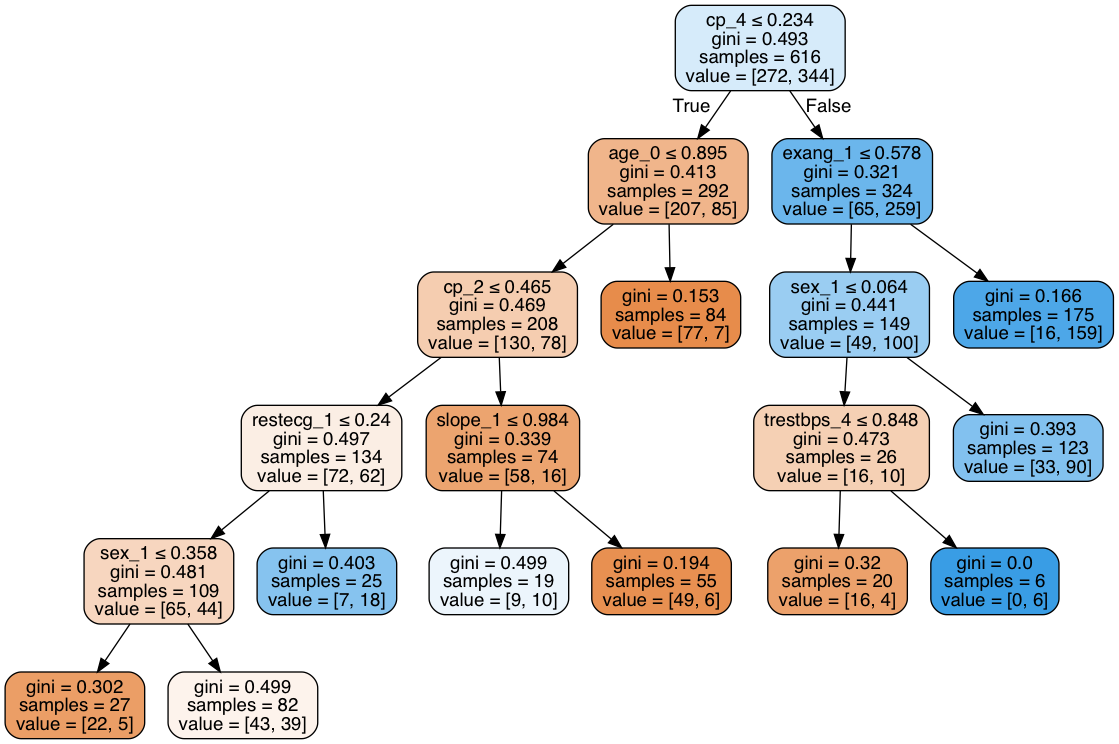

In [117]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus




model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Decision Tree is',metrics.accuracy_score(train_Y, pred_training))

#print('F1 micro: is',f1_score(test_Y, prediction4, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction4, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction4, average='weighted'))




model_Decision_Tree = model

dot_data = StringIO()
dtc_settings = {
    'criterion': 'entropy',
    'min_samples_split': 100,
    'min_samples_leaf': 100,
    'max_features': 'auto',
    'max_depth': 5,
    'class_weight': 'balanced',
    
}


export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=train_X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

plt.show(graph)

Image(graph.create_png())

#graph.write_pdf("decision_tree_OHE.pdf")



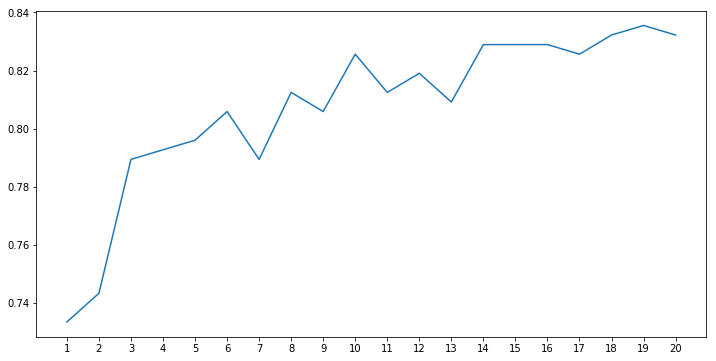

Accuracies for different values of n are: [0.73355263 0.74342105 0.78947368 0.79276316 0.79605263 0.80592105
 0.78947368 0.8125     0.80592105 0.82565789 0.8125     0.81907895
 0.80921053 0.82894737 0.82894737 0.82894737 0.82565789 0.83223684
 0.83552632 0.83223684] with the max value as  0.8355263157894737  with index:  18


In [48]:
a_index=list(range(1,21))
a=pd.Series()
x=list(range(1, 21))
for i in list(range(1,21)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',(a.values.max()), ' with index: ', a.values.argmax(axis=0))

model_KNN = KNeighborsClassifier(n_neighbors=19)




In [49]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
print('F1 micro: is',f1_score(test_Y, prediction6, average='micro'))
print('F1 macro: is',f1_score(test_Y, prediction6, average='macro'))
print('F1 weighted: is',f1_score(test_Y, prediction6, average='weighted'))


model_GaussianNB = model



The accuracy of the NaiveBayes is 0.8355263157894737
F1 micro: is 0.8355263157894737
F1 macro: is 0.8336834733893558
F1 weighted: is 0.8351807828394516


In [50]:
model=RandomForestClassifier(n_estimators=200)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))
print('F1 micro: is',f1_score(test_Y, prediction2, average='micro'))
print('F1 macro: is',f1_score(test_Y, prediction2, average='macro'))
print('F1 weighted: is',f1_score(test_Y, prediction2, average='weighted'))

model_RandomForest = model



The accuracy of the Random Forests is 0.8092105263157895
F1 micro: is 0.8355263157894737
F1 macro: is 0.831672203765227
F1 weighted: is 0.8338506149093664


In [32]:

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction




kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=19),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.806522,0.033254
Radial Svm,0.803261,0.032409
Logistic Regression,0.804348,0.029166
KNN,0.783696,0.038721
Decision Tree,0.720652,0.054576
Naive Bayes,0.796739,0.032263
Random Forest,0.786957,0.040437


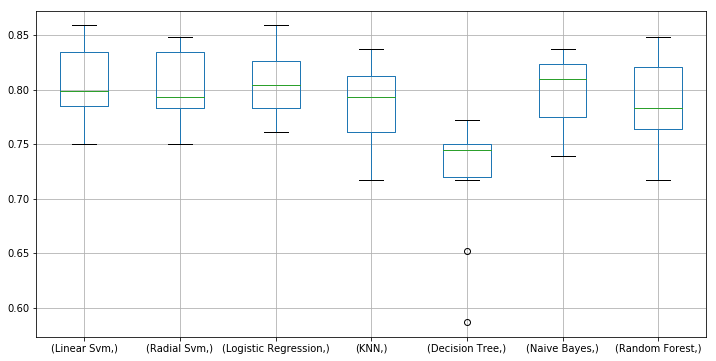

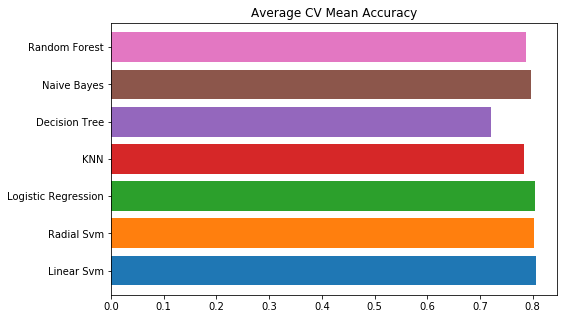

In [33]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

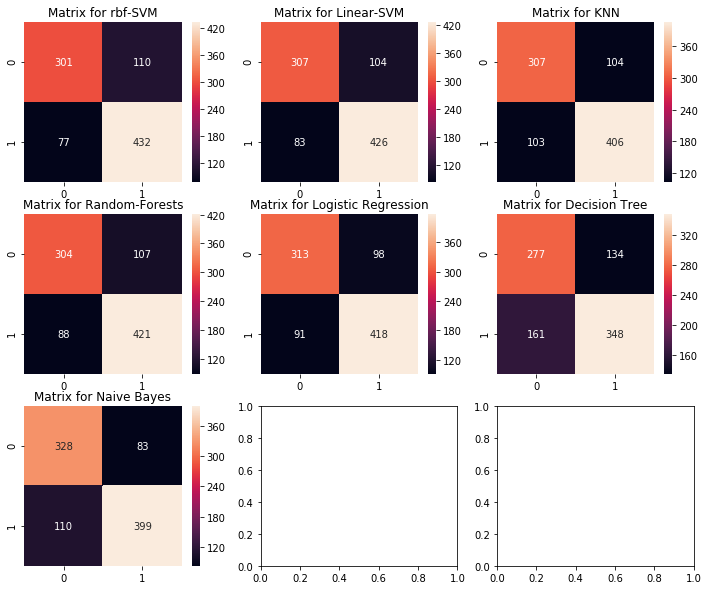

In [34]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

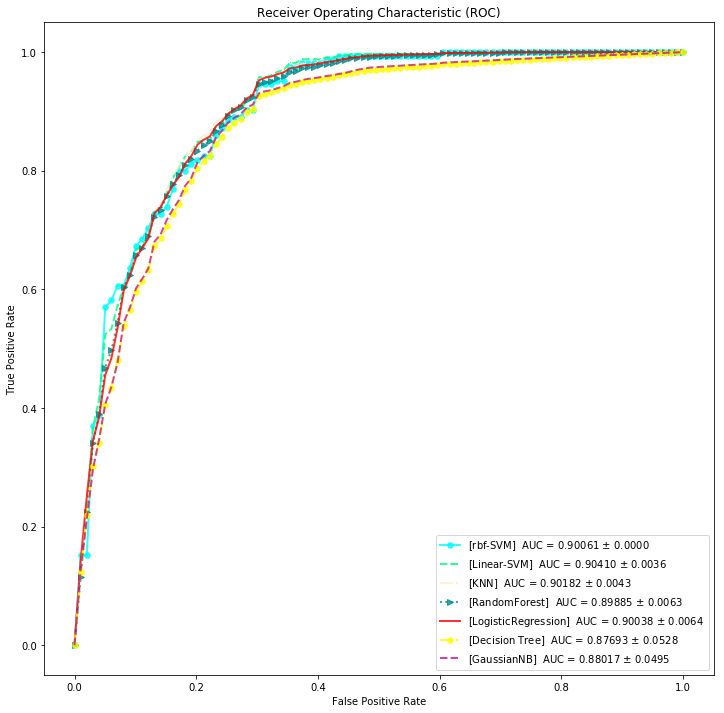

In [106]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': model_RBF_SVM,
        'color': 'aqua',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': model_Linear_SVM,
        'color': 'springgreen',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': model_KNN, 
        'color': 'blanchedalmond',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'RandomForest',
        'model': model_RandomForest,
        'color': 'darkcyan',
        'linestyle': 'dotted',
        'markers': '>',
       
    },        
    {
        'label' : 'LogisticRegression',
        'model': model_Logistic_Regression,
        'color': 'red',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': model_Decision_Tree, 
        'color': 'yellow',
        'linestyle': '-.',
        'markers': 'h'
    },
    {
        'label' : 'GaussianNB',
        'model': model_GaussianNB,  
        'color': 'mediumvioletred',
        'linestyle': '--',
        'markers': ''
    }, 
]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
y = Y



   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_Y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)




    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()





In [38]:
from sklearn.model_selection import GridSearchCV
C=[1e-3,1e-2,0.05,0.1]
gamma=[1e-4,1e-3, 1e-2, 0.1]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
0.7913043478260869
SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    3.5s finished


In [ ]:
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
from sklearn.model_selection import  StratifiedShuffleSplit, GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel_types=['rbf']
param_grid = dict(kernel = kernel_types, gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))




In [ ]:
# Train classifiers

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
from sklearn.model_selection import  StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


C_range = np.logspace(-5, 5, 11)
gamma_range = np.logspace(-5, 5, 11)
kernel_types=['rbf']
param_grid = dict(kernel = kernel_types, gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=42)
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=cv, verbose=True)
grid.fit(X, Y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))





In [110]:
# Train classifiers

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
from sklearn.model_selection import  StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


C_range = np.logspace(-5, 3, 9)
gamma_range = np.logspace(-8, -5, 3)
kernel_types=['linear']
param_grid = dict(kernel = kernel_types, gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=cv, verbose=True)
grid.fit(X, Y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))






Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best parameters are {'C': 1.0, 'gamma': 1e-08, 'kernel': 'linear'} with a score of 0.80


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.0min finished


In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.0001)),
                                              ('RFor',RandomForestClassifier(n_estimators=400,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=79),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=400,random_state=0,learning_rate=0.01)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()